In [15]:
import json

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

from loldle_solver.solver import Solver


sns.set_theme()
plt.rcParams["figure.figsize"] = (10, 10)

In [2]:
solver = Solver()

results = {}
for champion in tqdm(solver.df["name"]):
    tries = solver.run_full_game(champion)
    solver.reset()
    results[champion] = tries

  0%|          | 0/166 [00:00<?, ?it/s]

In [7]:
with open("results.json", "w") as fp:
    json.dump(results, fp, indent=4)

In [2]:
with open("results.json") as fp:
    results = json.load(fp)

In [3]:
count_df = pd.Series(results).value_counts().sort_index().to_frame()
count_df.index.name = "# of Guesses"
count_df.rename(columns={"count": "Frequency"}, inplace=True)
mean = (count_df.index * count_df.Frequency).sum() / count_df.Frequency.sum()
count_df

,Frequency
# of Guesses,
1,1
2,92
3,69
4,4


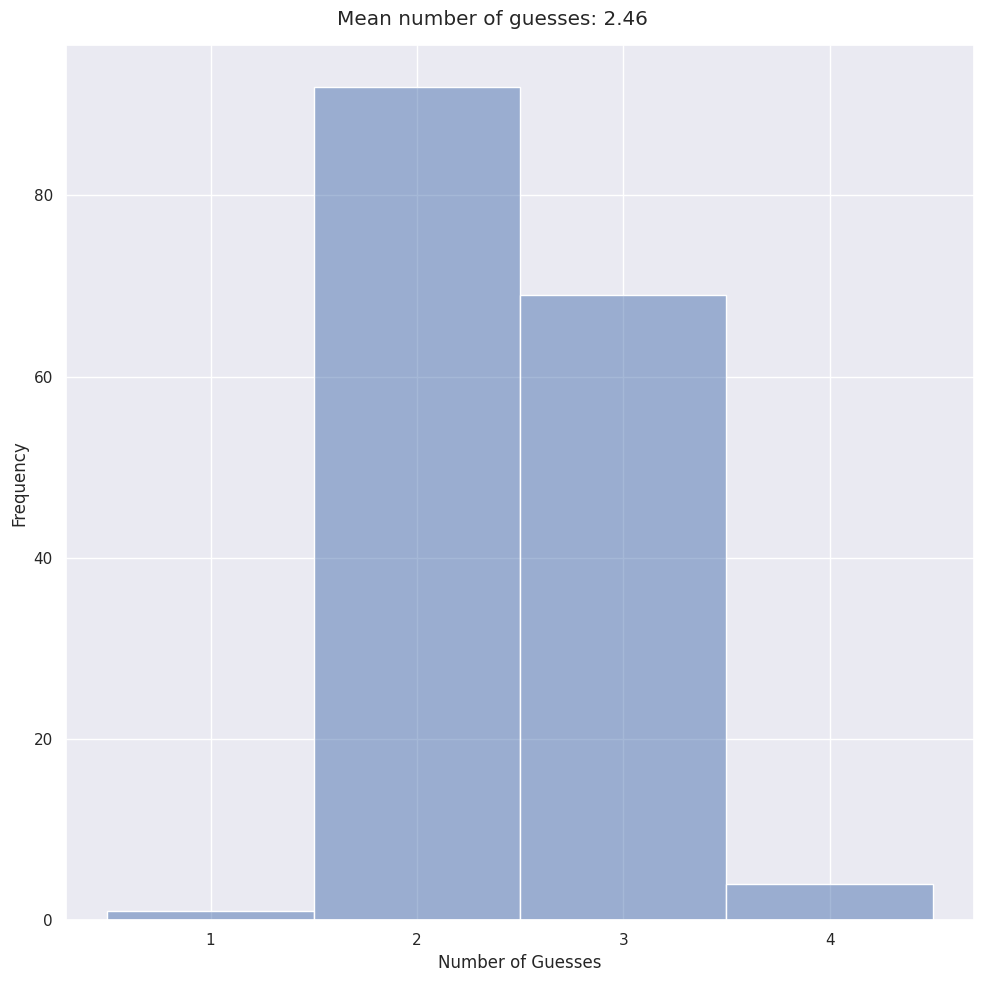

In [16]:
ax = sns.histplot(data=results.values(), discrete=True, legend=False)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Number of Guesses")
plt.ylabel("Frequency")
plt.suptitle(f"Mean number of guesses: {mean:.2f}")
plt.tight_layout()
plt.show()